<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

# Grouping with Pandas (Code Along)

***

Week 2 | Lesson 4.1

***Titanic Dataset***

I dropped Ticket, Cabin, Age have missing values, and/or "letters NUMBERS", no the best practice at all, but we want to concentrate on implementing group by


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [30]:
#### Read the dataset, 

path_to_file = '/Users/ryandunlap/Desktop/DSI-SF-2/datasets/titanic/titanic_clean.csv' ## Change it to your path
titanic = pd.read_csv(path_to_file)
titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S


In [31]:
## What can we tell about the entire dataset?
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,712.0,448.589888,258.683191,1.00,222.75,445.00000,677.25,891.0000
Survived,712.0,0.404494,0.491139,0.00,0.00,0.00000,1.00,1.0000
Pclass,712.0,2.240169,0.836854,1.00,1.00,2.00000,3.00,3.0000
Age,712.0,29.642093,14.492933,0.42,20.00,28.00000,38.00,80.0000
SibSp,712.0,0.514045,0.930692,0.00,0.00,0.00000,1.00,5.0000
Parch,712.0,0.432584,0.854181,0.00,0.00,0.00000,1.00,6.0000
Fare,712.0,34.567251,52.938648,0.00,8.05,15.64585,33.00,512.3292


In [32]:
## How many rows and columns does the dataset has
print 'Shape', titanic.shape
## Lets find the type and missing values (if any)
print titanic.isnull().sum()
titanic.info()

Shape (712, 10)
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 55.7+ KB


Now we have a **"cleaner"** version of our dataset, but we can not infer anything yet.

**Here is where group by comes handy**

Identify the parameters we need

***titanic.groupby?***

***Notice***
1. Groups don't really print anything interesting on their own df.groupby([var_1])
2. When assign to a variable/new data frame the var is a SeriesGroupBy object
   


In [33]:
## Group the dataset by Sex (by it own we don't get an output) 
print titanic.groupby(['Sex'], )
print "\n-----\n"

## Group the data set by ([Sex])[Age] Key/column/feature group
## and assign it to a variable called "group", print group and type of group
titanic_1 = titanic.groupby(['Sex'])[['Age']]
print titanic_1
print type(titanic_1)


-----

<class 'pandas.core.groupby.DataFrameGroupBy'>


**Groups can be operated on in aggregate and they take numpy functions**

Lets take the group created before and calculate, mean, median, count and max

In [34]:
print titanic_1.mean()
print "\n===\n"
print titanic_1.median()
print '\n====\n'
print titanic_1.count()
print '\n====\n'
print titanic_1.max()

              Age
Sex              
female  27.745174
male    30.726645

===

         Age
Sex         
female  27.0
male    29.0

====

        Age
Sex        
female  259
male    453

====

         Age
Sex         
female  63.0
male    80.0


**A quick note about two popular aggregates that seem the same, but are not!**

.count() vs .size()

.count() gives us counts of record rows repeated over variable columns

.size() gives us counts as series, not repeated values over column variables

In [35]:
## Use size() to find the number of observations Per Class, check type
titanic_class = titanic.groupby('Pclass').size()
print titanic_class

titatic_class_1 = titanic.groupby('Pclass').count()
print titatic_class_1
print "\n===\n"

Pclass
1    184
2    173
3    355
dtype: int64
        PassengerId  Survived  Name  Sex  Age  SibSp  Parch  Fare  Embarked
Pclass                                                                     
1               184       184   184  184  184    184    184   184       184
2               173       173   173  173  173    173    173   173       173
3               355       355   355  355  355    355    355   355       355

===



In [36]:
## Use count() to find the number of survived and not survived passengers, called it tit_class_ct, check type
titanic_class_ct = titanic.groupby(['Survived']).count()
print titanic_class_ct
print type(titanic_class_ct)

          PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Fare  Embarked
Survived                                                                   
0                 424     424   424  424  424    424    424   424       424
1                 288     288   288  288  288    288    288   288       288
<class 'pandas.core.frame.DataFrame'>


In [37]:
## What is the type of tit_class_ct


With a Pandas **group object**,

.count(), .size(), .sum(), .mean(), .std() are some very common ways to apply calcuation operations in aggregate to subsets of your data.

[Pandas .groupby docs](http://pandas.pydata.org/pandas-docs/version/0.15.2/groupby.html)

### Method 1
    (the one that makes more sense to me)

df.groupby(['var_1', 'var_2', ..........])[[ "what I want to know" ]].what_metric_I_want( )

In [38]:
## Use approach 1 to find the average age of passengers group by Sex and survivorship


### Method 2
df.['what I want to know'].groupby(['var_1', 'var_2', ..........]).what_metric_I_want( )

In [39]:
## Use approach 2 to find the average age of passengers group by Sex and survivorship 


In [43]:
## Use your group by from before by now add another [] to the section [what I want to know], 
## pass the column names to a list
## print the index
my_titanic = titanic.groupby(['Sex','Survived'])[['Age']].mean()

my_titanic



Age
Sex    Survived           
female 0         25.046875
       1         28.630769
male   0         31.618056
       1         27.276022

In [44]:
my_titanic.reset_index(inplace=True)
my_titanic

,Sex,Survived,Age
0,female,0,25.046875
1,female,1,28.630769
2,male,0,31.618056
3,male,1,27.276022


### Hierarchical Index
You can remove hierarchical index using reset_index() or passing as_index=False, inside the groupby

My preference is reset_index()

In [45]:
## Find the average age of passengers group by Sex and survivorship 
    ## Reset the index, use the apply function => pass np.FUNCTION, rename Age as Aver_Age (.add_prefix())

titanic.groupby(['Sex','Survived'])['Age'].apply(np.mean).reset_index()

,Sex,Survived,Age
0,female,0,25.046875
1,female,1,28.630769
2,male,0,31.618056
3,male,1,27.276022


In [51]:
## Using the previous group by example, pass the column names to a list
titanic[titanic['Survived']==0].groupby(['Fare','Pclass'])[['Age']].mean().reset_index().head()

,Fare,Pclass,Age
0,0.0000,1,39.000000
1,0.0000,3,34.666667
2,4.0125,3,20.000000
3,5.0000,1,33.000000
4,6.2375,3,61.000000


In [15]:
## Reset Index using as_index=False


In [53]:
### Lets find the Number/Count of Passengers that did not survived by sex and class
    ## use a mask titanic[mask]..... 
titanic[titanic['Survived']==0].groupby(['Fare','Pclass'])[['Age']].std().reset_index().head()


,Fare,Pclass,Age
0,0.0000,1,1.000000
1,0.0000,3,15.044379
2,4.0125,3,NaN
3,5.0000,1,NaN
4,6.2375,3,NaN


In [17]:
### Lets find the Average Fare passengers paid by Class, Sex and Survivorship
    ## use apply, rename the the Fare column as Aver_Fare


## Let's dive into the dataset, exploring/creating subsets
![](http://www.w3resource.com/sql/sql-root-images/group-by.gif)

### Subsets

**recall:**

df_1 = df.groupby( ['var_1', 'var_2', ..] )[ ['var_3'] ].apply(np.mean).add_prefix_('Something_').reset_index()


[apply function documentation](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.apply.html)

df['column_name'] = df['column_name'].apply(lambda x: round(x, 0)).astype(int)




In [65]:
## Create a subset called titanic_1 that shows the Average age of passengers by sex and survivorship
    ##Rename the column of interest as 'Round_ave_', round this column, the final number is an integer with no decimal points 
    ## Hint apply(lambda)
titanic_1 = titanic.groupby(['Sex','Survived'])[['Age']].mean().rename(columns={'Age':'Round_ave_age'}).reset_index()['Round_ave_age'].map(lambda x: int(x))
titanic_1.head()

0    25
1    28
2    31
3    27
Name: Round_ave_age, dtype: int64

In [67]:
## Is there a difference in average Fare paid by port of embarked and P class?
titanic.groupby(['Embarked','Pclass'])[['Fare']].mean().reset_index().sort_values('Pclass')

,Embarked,Pclass,Fare
0,C,1,108.246399
3,Q,1,90.000000
6,S,1,74.172415
1,C,2,26.811947
4,Q,2,12.350000
7,S,2,21.075000
2,C,3,11.369927
5,Q,3,12.780904
8,S,3,13.529451


In [70]:
## By Sex, Pclass and Survived, lets find the 75 quantile based on Age quantile(0.75) round the ouput
titanic.groupby(['Sex','Pclass','Survived'])['Age'].quantile(.75).reset_index()

,Sex,Pclass,Survived,Age
0,female,1,0,25.0
1,female,1,1,35.0
2,female,2,0,32.5
3,female,2,1,28.0
4,female,3,0,22.0
5,female,3,1,19.0
6,male,1,0,45.5
7,male,1,1,36.0
8,male,2,0,30.5
9,male,2,1,3.0


In [71]:
## How many of them survived or not by port of Embark
    ## Lets use the aggregate function and define a list of tuples, passed it to the dataframe 
    ## [('Mean', np.mean), ('Var', np.var), ('Std', np.std), ('Count', 'count')]
titanic.groupby(['Embarked'])[['Survived']].size()

Embarked
C    130
Q     28
S    554
dtype: int64

In [72]:
func_tuples = [('Mean', np.mean), ('Var', np.var), ('Std', np.std)]
titanic_sub_2 = titanic.groupby( ['Embarked','Survived', 'Sex'] )[ ['Age', 'Fare'] ].agg(func_tuples).reset_index()
titanic_sub_2

Embarked Survived     Sex        Age                              Fare  \
                                   Mean         Var        Std       Mean   
0         C        0  female  25.583333  300.441667  17.333253  16.963200   
1         C        0    male  34.744444  211.120707  14.529993  44.690836   
2         C        1  female  28.645455  247.596507  15.735200  86.807425   
3         C        1    male  29.725833  235.833582  15.356874  82.971021   
4         Q        0  female  28.100000   73.050000   8.546929  13.375000   
5         Q        0    male  31.066667  477.745238  21.857384  19.688333   
6         Q        1  female  21.571429   52.285714   7.230886  20.213100   
7         Q        1    male  29.000000         NaN        NaN   7.750000   
8         S        0  female  24.698113  189.137881  13.752741  24.315960   
9         S        0    male  31.176667  182.099119  13.494411  19.911803   
10        S        1  female  28.996241  182.880668  13.523338  44.254135   
11        S        1    male  26.386029  290.097609  17.032252  30.496690   

                              
             Var         Std  
0      33.231056    5.764638  
1    2875.725463   53.625791  
2    8195.446699   90.528706  
3   18423.500309  135.733195  
4      89.937500    9.483538  
5     466.927915   21.608515  
6     949.835899   30.819408  
7            NaN         NaN  
8     762.594876   27.615120  
9     736.249011   27.133909  
10   2700.389715   51.965274  
11    994.135200   31.529910

## What's going on here!?

_(visually)_

In [22]:
## By port of Embark, survivorship and sex, lets Find Age and Fare [('Mean', np.mean), ('Std', np.std)]



## 2-5 minutes try to do this with a partner:

1. Are there any other numpy functions you find them helpful, if so apply them to a subset 
2. How can create a subset similar to the titanic_sub subset with Survived = 1 and Fare >= 44 
3. How might you use this in the future?
4. Can you find the name, sex and port of embark of the oldest survival and non-survival?


More useful info about groups and selection in the [Pandas Cookbook docs](http://pandas.pydata.org/pandas-docs/stable/cookbook.html)

In [76]:
## Use Wild Car describe what happens to Age when you group by Survivorship, Pclass 
titanic[titanic['Survived']==1]['Age'].max()


80.0

In [82]:
## Def function that return the top 10 passengers that paid the highest 'Fare '
## Use 5 as the base number for rows
def top_fct(df, n=5, column='Fare'):
    return df.sort_values(column)[-n:]


#titanic.sort_values()

top_fct(titanic,10,'Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
365,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,26.5500,S
224,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,7.7500,Q
25,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,10.5000,S
591,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,71.0000,S
530,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,10.5000,S
90,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,7.7500,Q
392,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,49.5042,C
73,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,34.6542,C
677,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,7.7750,S
497,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,30.0000,S


In [25]:
## Pass the function to a datframe group by "Survived" and Sex and find their age


In [26]:
## For the "for loop" lovers: Grouped the data frame by class, print the class number and then print the df
## 'Class: %s' % grp
## 'DataFrame description: \n%s\n' % df.head()


## 10 Minute Break!

# (basic) Plotting with Groups


In [27]:
# This is a reminder of what our dataframe looks like
titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S


In [28]:
titanic.groupby(["Pclass"]).size()

Pclass
1    184
2    173
3    355
dtype: int64

<function matplotlib.pyplot.show>

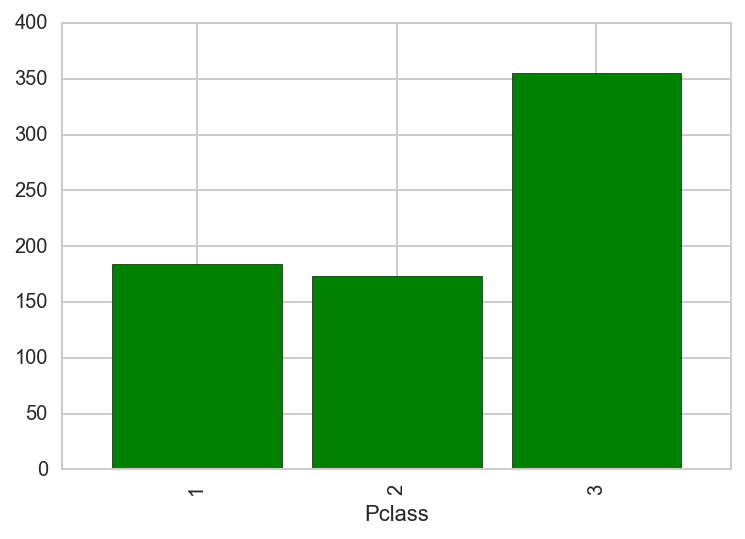

In [84]:
## Plot a kind='bar' of the number of Passengers by Pclass and Sex
    ## Does the graph look ok?
titanic.groupby('Pclass').size().plot(kind='bar',color='g',width=.85)
plt.show

### Groupby and graphs with more than one variable

<function matplotlib.pyplot.show>

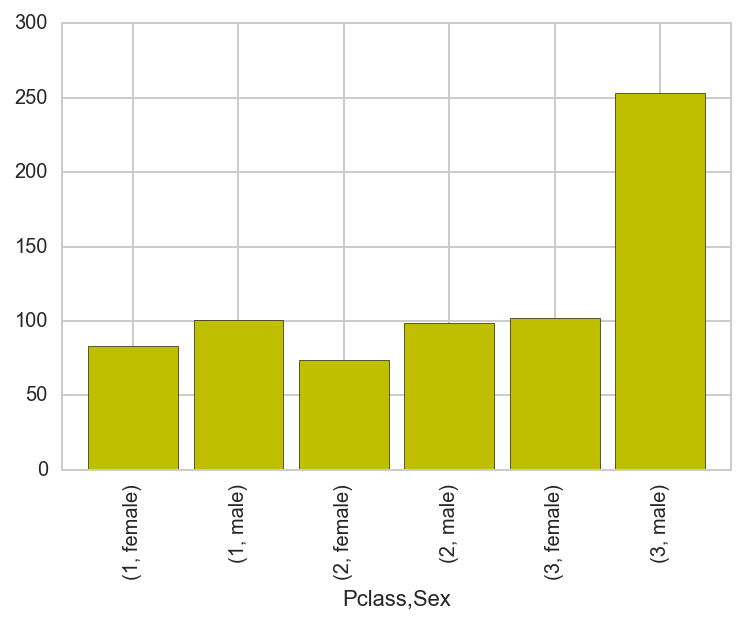

In [86]:
## Plot a kind='bar' of the data set group by Pclass and Sex, use .size()
titanic.groupby(['Pclass','Sex']).size().plot(kind='bar',color='y',width=.85)
plt.show

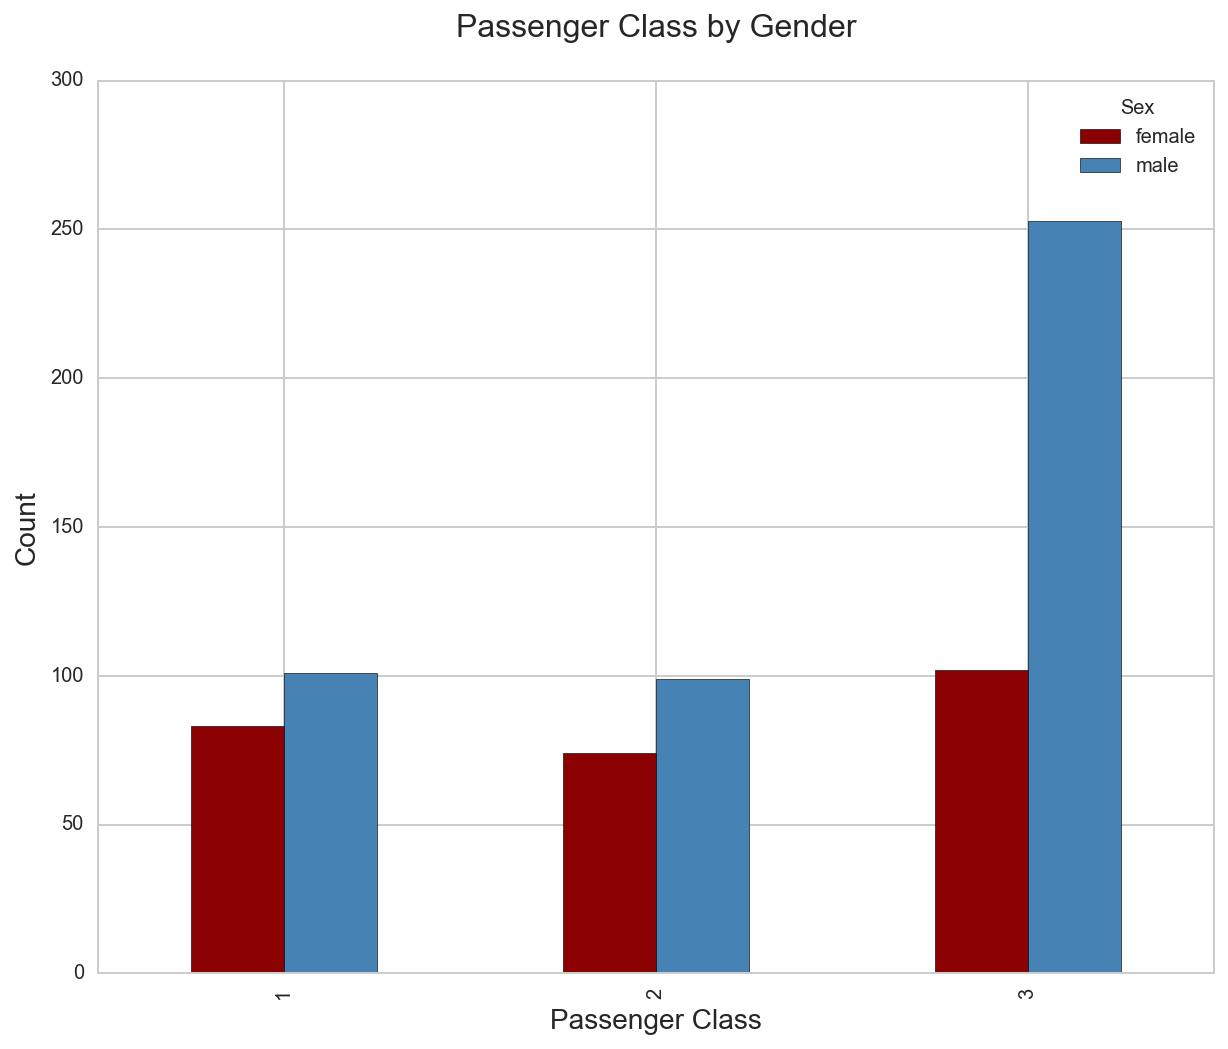

In [88]:
## Use the same code as before, make a kind='bar' graph, use unstack  => will pull-apart group values for easy display
    ## Class by Sex (Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd))
    ## .size().unstack(), colors=['darkred', 'steelblue']
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
titanic.groupby(['Pclass','Sex']).size().unstack().plot(kind="bar", 
                                                       color=['darkred', 'steelblue'],
                                                       ax=ax)
plt.xlabel("Passenger Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title('Passenger Class by Gender\n', fontsize=16)
plt.show()

In [32]:
titanic.groupby(['Pclass','Survived','Sex'])[['Age']].size().reset_index()

,Pclass,Survived,Sex,0
0,1,0,female,3
1,1,0,male,61
2,1,1,female,80
3,1,1,male,40
4,2,0,female,6
5,2,0,male,84
6,2,1,female,68
7,2,1,male,15
8,3,0,female,55
9,3,0,male,215


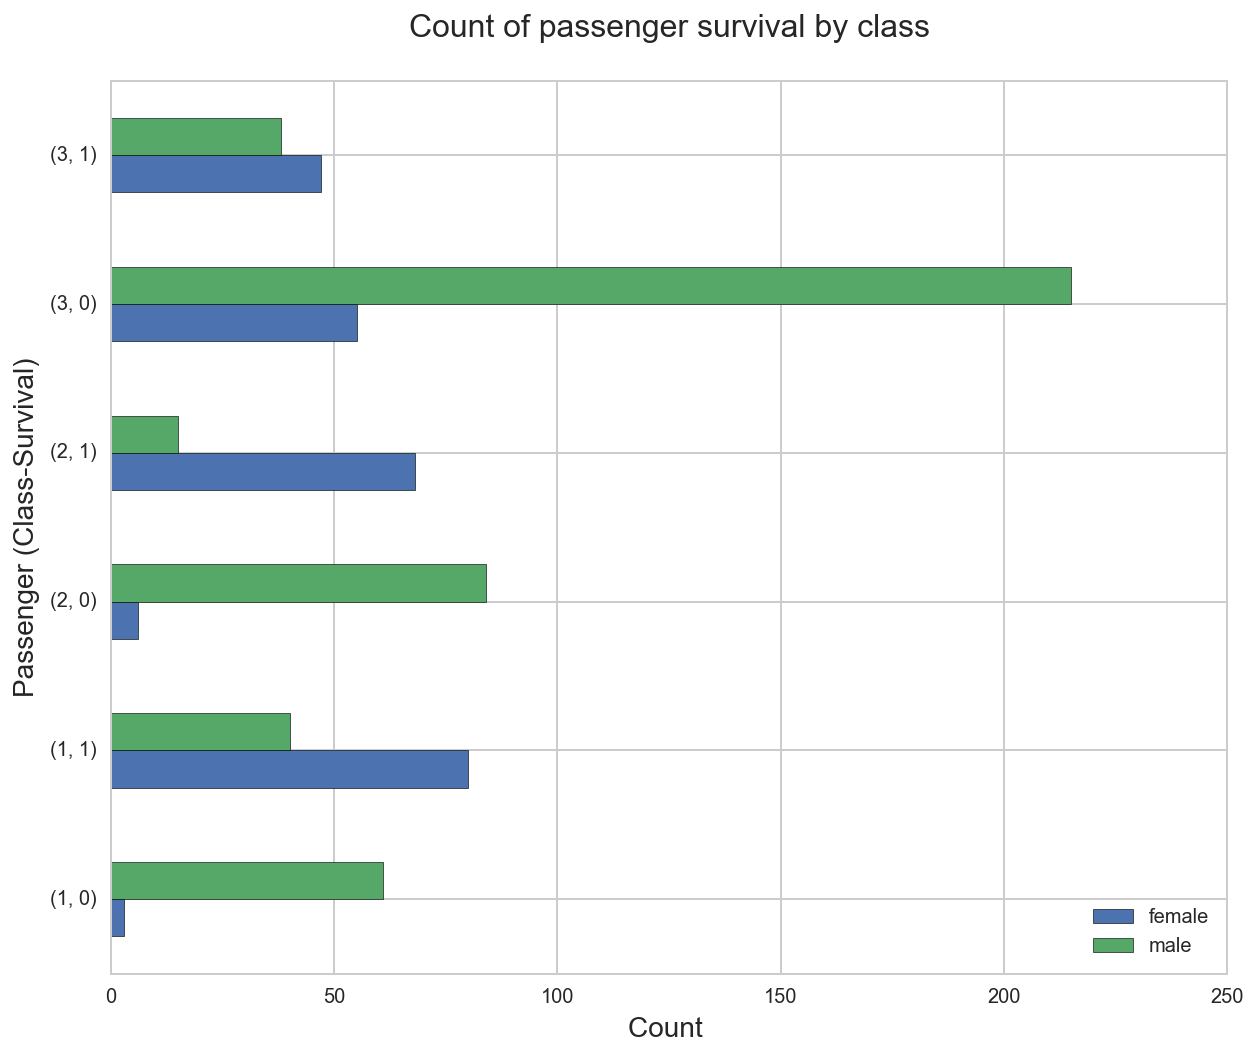

In [89]:
## Use the same code as before, make a kind='barh' graph, use unstack
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

titanic.groupby(['Pclass','Survived','Sex'])[['Age']].size().unstack().plot(kind="barh", ax=ax)

plt.xlabel("Count ", fontsize=14)
plt.ylabel("Passenger (Class-Survival)", fontsize=14)
plt.title('Count of passenger survival by class\n', fontsize=16)
plt.legend(loc='lower right')
plt.show()

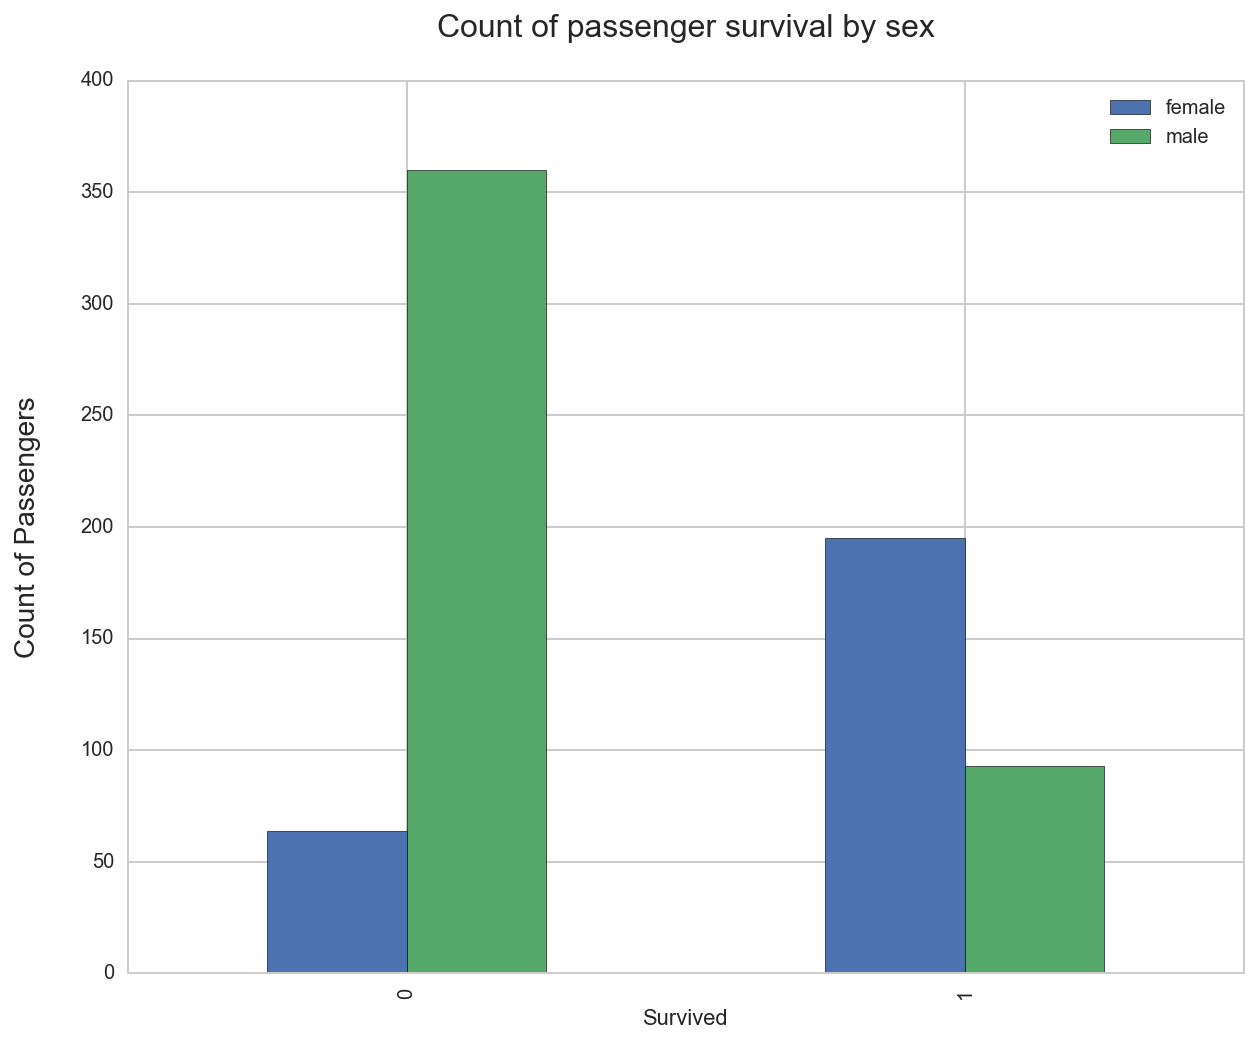

In [90]:
# Using unstack, create a kind='bar' that shows which group (men or women) survived the most

# Using unstack, create a kind='bar' that shows which group (men or women) survived the most

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
titanic.groupby(['Survived','Sex']).size().unstack().plot(kind="bar", ax=ax)

plt.ylabel("Count of Passengers\n", fontsize=14)
plt.title('Count of passenger survival by sex\n', fontsize=16)
plt.legend(loc='upper right')
plt.show()
plt.show() 

In [35]:
# Stacking isn't a bad choice for fewer categories but can look cluttery with lots of categories use stacked=True



Bar charts are great for displaying quanitites with groups and understanding quantity / size within subsets.  This is only an "introduction".  There are many ways to plot things.

***List of options for graph***

‘bar’ or ‘barh’ for bar plots

‘hist’ for histogram

‘box’ for boxplot

‘kde’ or 'density' for density plots

‘area’ for area plots

‘scatter’ for scatter plots

‘hexbin’ for hexagonal bin plots

‘pie’ for pie plots

In [36]:
titanic.groupby( ['Sex','Embarked', 'Age'] )[ ['Survived'] ].size().reset_index().head(5)

,Sex,Embarked,Age,0
0,female,C,0.75,2
1,female,C,1.00,1
2,female,C,3.00,1
3,female,C,4.00,1
4,female,C,5.00,1


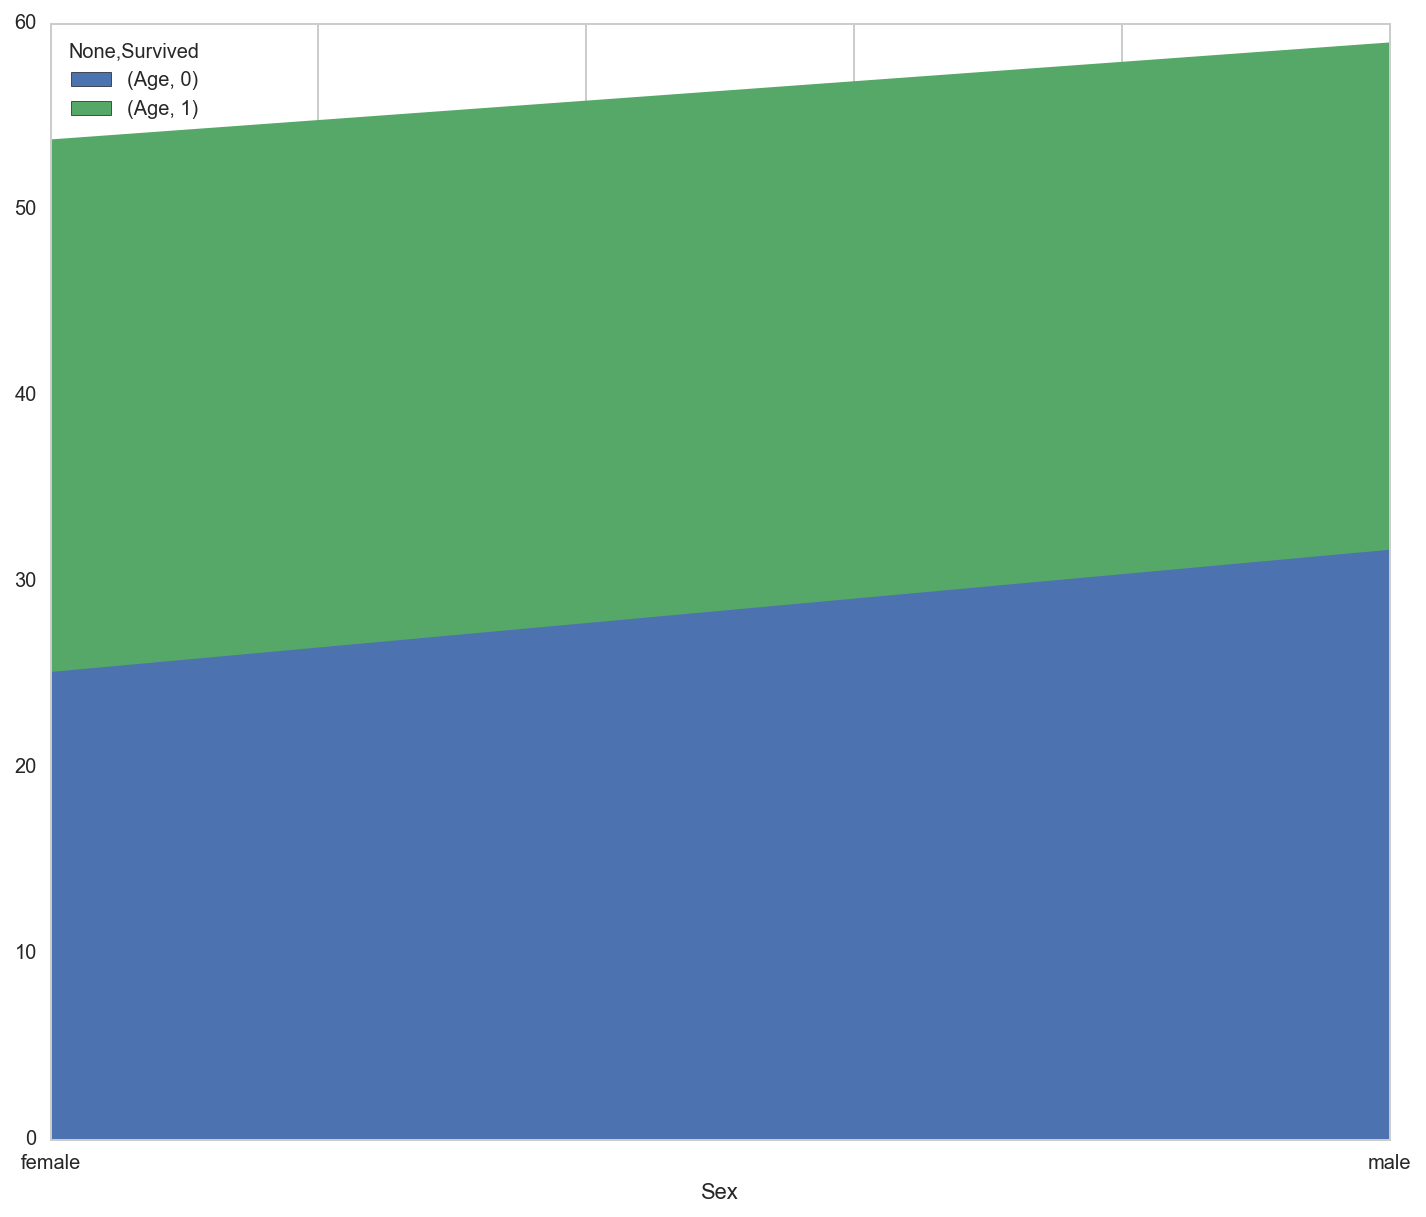

In [37]:
## Here is a graph that I hope you never use
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
titanic.groupby( ['Sex', 'Survived'] )[ ['Age'] ].mean().unstack().plot(kind="area", ax=ax)

plt.show()

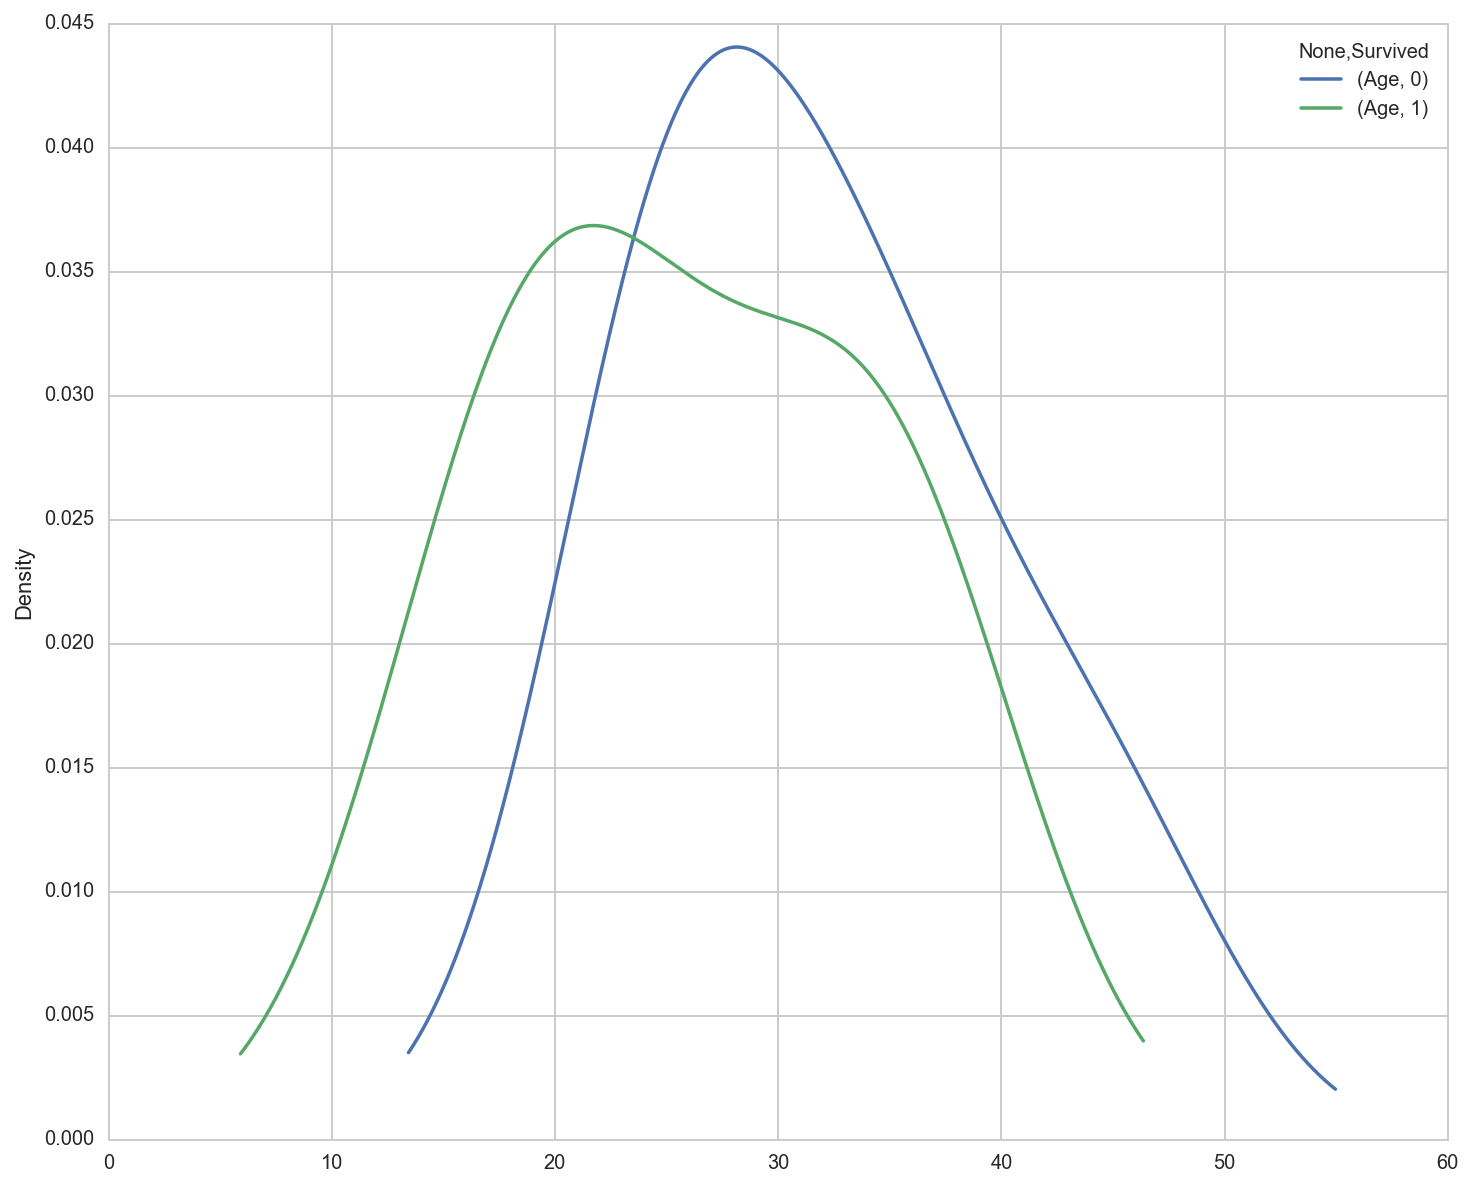

In [38]:
## Density Plot
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
titanic.groupby( ['Sex', 'Pclass','Survived'] )[ ['Age'] ].mean().unstack().plot(kind="kde", ax=ax)
plt.show()

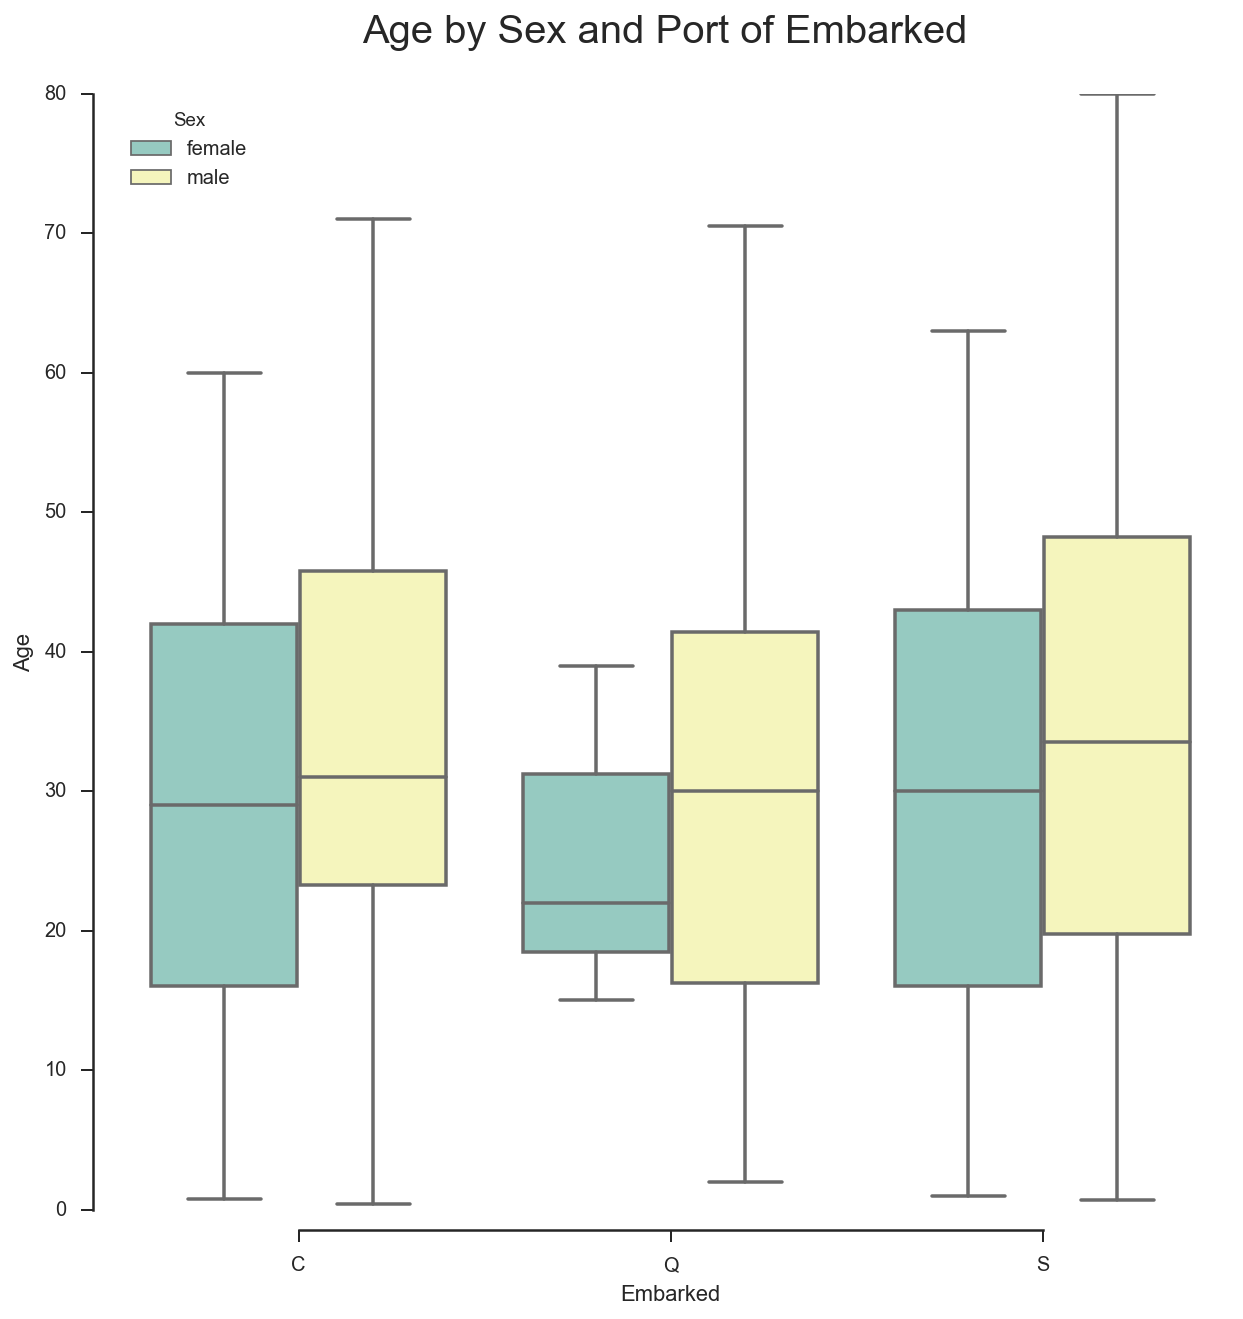

In [39]:
## A graph that doesn't use groupby, but uses a subset
subset_tita = titanic.groupby( ['Sex','Embarked', 'Age'] )[ ['Survived'] ].size().reset_index()

fig = plt.figure(figsize=(10,10))
sns.set(style="ticks")

sns.boxplot(x='Embarked', y="Age", hue="Sex", data=subset_tita, palette="Set3")
sns.despine(offset=10, trim=True)

plt.title('Age by Sex and Port of Embarked \n', fontsize = 20)
plt.show()

In [40]:
# Other group by methods include -- 
# Thanks to DAVID!!
groupby_list = """
gb.filter  gb.get_group  gb.height  gb.last gb.median gb.ngroups    gb.plot       gb.rank       gb.std        gb.transform
gb.aggregate  gb.count      gb.cumprod    gb.dtype      gb.first      gb.groups     gb.hist       gb.max        gb.min        gb.nth        gb.prod       gb.resample   gb.sum        gb.var
gb.apply      gb.cummax     gb.cumsum     gb.fillna     gb.gender     gb.head       gb.indices    gb.mean       gb.name       gb.ohlc       gb.quantile   gb.size       gb.tail       gb.weight
"""

cleaned_list = map(lambda item: item.replace("gb", "").strip(), groupby_list.split(".")[1:])
pd.DataFrame(cleaned_list, columns=["Aggregate Functions"])

,Aggregate Functions
0,filter
1,get_group
2,height
3,last
4,median
5,ngroups
6,plot
7,rank
8,std
9,transform
